In [1918]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from datetime import datetime, date, time
import seaborn as sns

In [1919]:
df = pd.read_csv('HRDataset.csv')

In [1920]:
df_grouped=df.groupby(['ManagerID'])['PerformanceScore'].size()

In [1921]:
df_grouped=df_grouped.to_frame()
df_grouped=df_grouped[(df_grouped['PerformanceScore'] > 10 )]
df_grouped_2=df.groupby(['ManagerID','PerformanceScore']).size()
df_grouped_2=df_grouped_2.to_frame()

In [1922]:
df_joined=df_grouped_2.join(df_grouped,on="ManagerID")
df_joined=df_joined.dropna()
df_joined=df_joined.drop(columns=['PerformanceScore'])
df_joined.groupby(['ManagerID'])
df_joined = df_joined.reset_index()
df_pip = df_joined[df_joined["PerformanceScore"].str.contains("PIP") == True]
df_exceeds = df_joined[df_joined["PerformanceScore"].str.contains("Exceeds") == True]
df_need = df_joined[df_joined["PerformanceScore"].str.contains("Needs Improvement") == True]
df_fully = df_joined[df_joined["PerformanceScore"].str.contains("Fully Meets") == True]

In [1923]:
df_pip=df_pip.rename(columns={0 :'Count'})
num_pip=df_pip['Count'].to_numpy()
num_pip_2=df_pip['ManagerID'].to_numpy()
df_need=df_need.rename(columns={0 : 'Count'})
num_need=df_need['Count'].to_numpy()
num_need_2=df_need['ManagerID'].to_numpy()

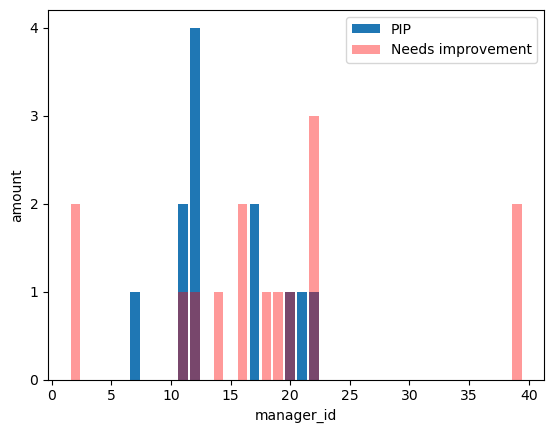

In [1924]:
fig, ax = plt.subplots()
ax.bar(num_pip_2,num_pip)
ax.bar(num_need_2,num_need,alpha=0.4,color='r')
ax.set_xlabel("manager_id")
ax.set_ylabel("amount")
ax.legend(["PIP", "Needs improvement"])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [1925]:
df_exceeds=df_exceeds.rename(columns={0 :'Count'})
num_exceeds=df_exceeds['Count'].to_numpy()
num_exceeds_2=df_exceeds['ManagerID'].to_numpy()
df_fully=df_fully.rename(columns={0 : 'Count'})
num_fully=df_fully['Count'].to_numpy()
num_fully_2=df_fully['ManagerID'].to_numpy()

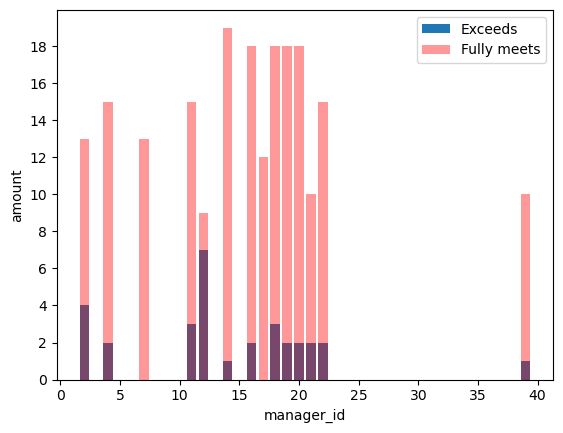

In [1926]:
fig, ax = plt.subplots()
ax.bar(num_exceeds_2,num_exceeds)
ax.bar(num_fully_2,num_fully,alpha=0.4,color='r')
ax.set_xlabel("manager_id")
ax.set_ylabel("amount")
ax.legend(["Exceeds", "Fully meets"])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Manager with ID 12 seems to be pretty critical. He gives a higher numer of critical reports and a smaller number of positive ones. Everything else seems to be quite ordinary.

In [1927]:
df['DateofTermination'] = df['DateofTermination'].fillna('09/27/19')
df['DateofHire']=df['DateofHire'].apply(pd.to_datetime,format='%m/%d/%Y') 
df['DateofTermination'] = df['DateofTermination'].apply(pd.to_datetime,format='%m/%d/%y')
df['days'] = (df['DateofTermination'] - df['DateofHire']).dt.days

In [1928]:
f"{df.groupby(['RecruitmentSource']).size().idxmax()} {df.groupby(['RecruitmentSource'])['days'].sum().max()}"

'Employee Referral 56907.0'

The best type to keep the employees is Employee Referral.

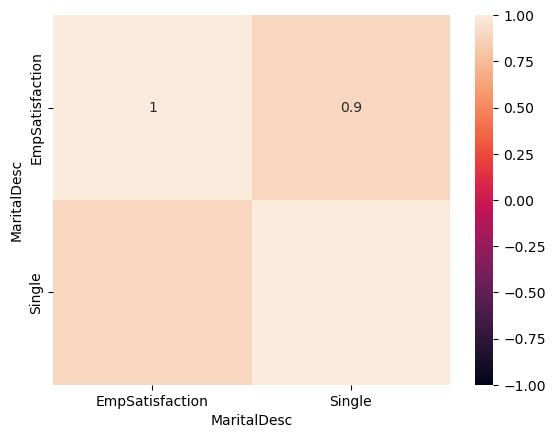

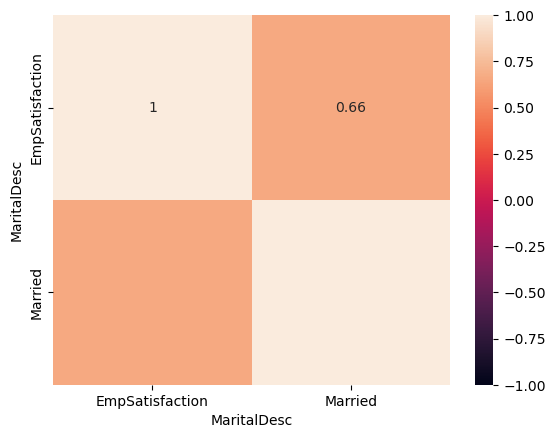

MaritalDesc,EmpSatisfaction,Divorced,Married,Separated,Single,Widowed
0,1.0,0.0,0.0,1.0,1.0,0.0
1,2.0,1.0,5.0,0.0,3.0,0.0
2,3.0,6.0,54.0,4.0,44.0,0.0
3,4.0,14.0,31.0,2.0,40.0,6.0
4,5.0,9.0,33.0,5.0,49.0,2.0


In [1929]:
df_new = pd.read_csv('HRDataset.csv')
df_clean=df_new[["EmpSatisfaction","MaritalDesc"]].dropna()
df_clean=df_new.pivot_table(index=df_clean['EmpSatisfaction'],columns=df_clean['MaritalDesc'],values='EmpSatisfaction',aggfunc='count').fillna(0)
df_clean=df_clean.reset_index()
sns.heatmap(df_clean[['EmpSatisfaction', 'Single']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
sns.heatmap(df_clean[['EmpSatisfaction', 'Married']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
df_clean

There is a strong correlation between being a single and being quite satisfied with the job in contrast to being married. Singles are more likely to provide higher satisfaction scores according to the data. Furthermore, the other categories have a low data count and are therefore excluded from the analysis.

In [1930]:
df_new[['DOB']] = df_new[['DOB']].apply(pd.to_datetime,format='%m/%d/%y') 
date = date(2019,9,27)
set_time = time(12, 0, 0)
date_time = datetime.combine(date,set_time)
df_new['years'] = (date_time - df_new['DOB']).dt.days
df_new=df_new.dropna(subset=['years'])
df_new['years']=round(df_new['years']/365,0)
df_new_years=df_new['years']
df_new_years=df_new_years.to_numpy()
df_new_years_2=df_new['years']
df_new_years_2=df_new_years_2.to_frame()
df_new_years_2['years'] = df_new_years_2.apply(lambda row: row+100 if int(row.iloc[0])<0  else row,axis=1)


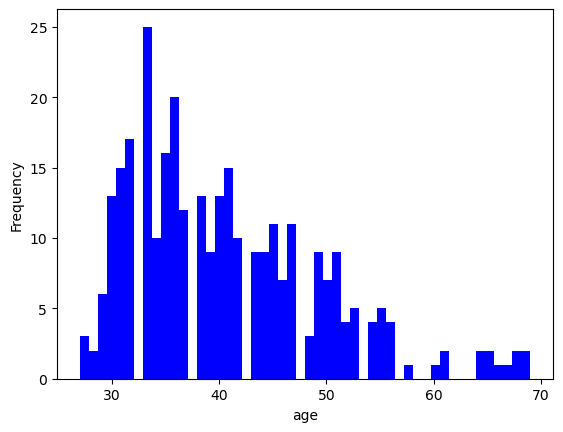

In [1931]:
df_new_years_2['years'].plot(kind='hist',bins=50,color='b',xlabel="age").locator_params(axis='y', integer=True)

Most of the employees are between 30 and about 40 years old.

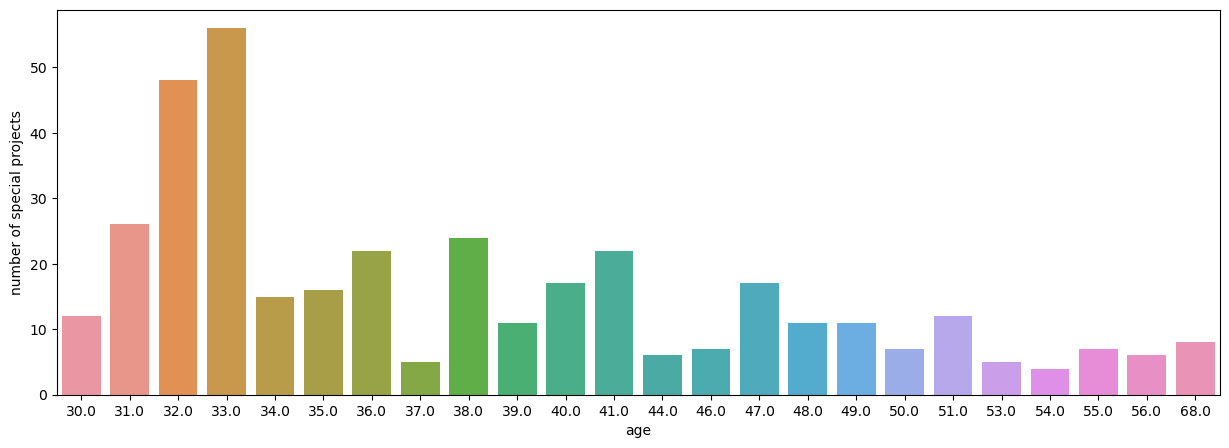

In [1932]:
df_new['years'] = df_new['years'].apply(lambda row: round(row+100,0) if row<0  else round(row,0))
df_new=df_new.groupby(['years','SpecialProjectsCount']).size()
df_new=df_new.to_frame()
df_new = df_new.reset_index()
df_new = df_new.drop(df_new[df_new['SpecialProjectsCount'] == 0.0].index)
df_new=df_new.rename( columns={0 :'Amount'})
df_new['total'] = df_new['SpecialProjectsCount'] * df_new['Amount']
df_new=df_new.groupby(['years'])['total'].sum()
df_new=df_new.to_frame()
df_new = df_new.reset_index()
plt.figure(figsize=(15,5))
age_plot=sns.barplot(x='years',y='total',data=df_new)
age_plot.set(xlabel='age', ylabel='number of special projects')
plt.show()

The younger employees have a higher number of special projects.